In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

def get_Dmetric(df, metric_pct):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    return f(metric_pct)

def get_HI(df):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    HI = (f(2.0) - f(98.0))/f(50.0)
    return HI

In [2]:
AAA = eclipse_DVH('Case9_AAA.txt')
AXB = eclipse_DVH('Case9_Dm.txt')

Case9_AAA.txt loaded 	 patID = Case9_AAA	 Prescription [Gy] = 65.010
Case9_Dm.txt loaded 	 patID = Case9_Dm	 Prescription [Gy] = 65.010


In [3]:
AXB.DVH_df.columns

Index(['Artefact_P8', 'GTV node1_P3', 'GTV node 2_P3', 'CTV65_P15',
       'CTV54_P11', 'L Orbit_P15', 'R Orbit_P15', 'L Optic Nerve_11',
       'R Optic Nerve_11', 'L Lens_P15', 'R Lens_P15', 'Optic Chiasm_P10',
       'Brain Stem_P17', 'Spinal Cord_P17', 'L Parotid_P17', 'R Parotid_P17',
       'CTV54 right_P4', 'CTV54 lev 1b_P3', 'Body_P17', 'BS 5mm_P3',
       'Lt Par edit_P17', 'PTV1_P16', 'PTV1 edit_P16', 'PTV2_P16',
       'PTV2 edit_P16', 'Pseudo Midline17', 'Pseudo Other_P10',
       'Pseudo Post_P15', 'Rt Par edit_P17', 'SC + 3mm_P17', 'SC + 5mm_P17',
       'Pseudo PTV1_P17', 'Pseudo PTV2_P17', 'origCTV54 all i3',
       'All CTV54_P3', 'L Couch rail_P3', 'R Couch Rail_P3', 'L Lens + 3mm_P3',
       'R Lens + 3mm_P3', 'Optic chiasm + 6', 'Pseudo ring_P8', 'Density L_P3',
       'Density R_P3', 'Pseudo PTV+++_P3'],
      dtype='object')

(50, 75)

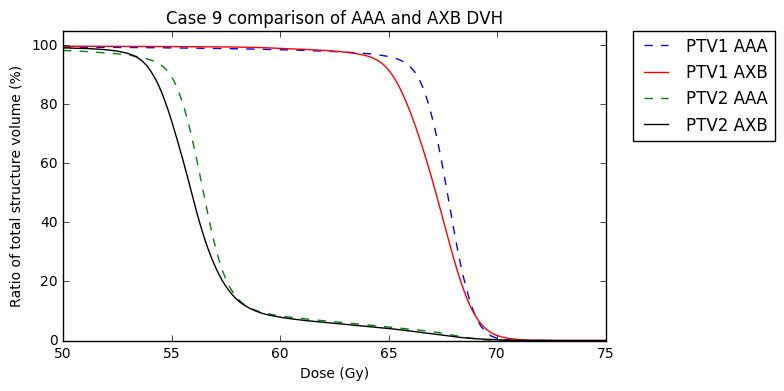

In [5]:
width=7
height=4
plt.figure(figsize=(width, height))

structure = 'PTV1_P16'
plt.plot(AAA.DVH_df[structure], label="PTV1 AAA", color='b', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV1 AXB",  color='r' )

structure = 'PTV2_P16'
plt.plot(AAA.DVH_df[structure], label="PTV2 AAA", color='g', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV2 AXB",  color='k' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Case 9 comparison of AAA and AXB DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')
plt.ylim([0,105])
plt.xlim([50,75])

In [6]:
Comparison_df = pd.concat([ AAA.metrics_df['PTV1_P16'], 
                            AXB.metrics_df['PTV1_P16'], 
                           
                           AAA.metrics_df['PTV2_P16'], 
                           AXB.metrics_df['PTV2_P16']], 
                           axis=1)
Comparison_df

,PTV1_P16,PTV1_P16,PTV2_P16,PTV2_P16
Metric,,,,
Structure,PTV1_P16,PTV1_P16,PTV2_P16,PTV2_P16
Approval Status,Unapproved,Unapproved,Unapproved,Unapproved
Plan,Case9_AAA,Case9_Dm,Case9_AAA,Case9_Dm
Course,1,1,1,1
Volume [cmÂ³],313.4,313.4,184.6,184.6
Dose Cover.[%],100.0,100.0,100.0,100.0
Sampling Cover.[%],100.0,100.0,100.0,100.0
Min Dose [%],8.2,0.0,2.8,0.0
Max Dose [%],111.8,115.9,110.7,111.4
